In [ ]:
#3. Vector Data Analysis

In [ ]:
#Creating shape files of points, lineas and polygons using shapely

In [ ]:
#Steps:
#1.Create point, line and polygon fetaures
#2.Assign the coordinates
#3.Then load into geodataframe
#4.Export to geojson

POINT (85 30)


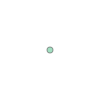

In [39]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
p1=Point(85,30)#(long,Lat)
print(p1)
p2=Point(80,20)#(long,Lat)
p2

LINESTRING (85 30, 80 20)


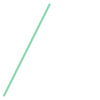

In [40]:
l1=LineString([p1,p2])
print(l1)
l1

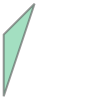

In [41]:
#To create a polygon
poly1=Polygon([(82,25),(83,26),(82,23)])
poly1

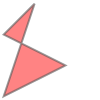

In [50]:
poly2=Polygon([(82,25),(83,26),(82,23),(84,24)])
poly2

In [43]:
#To save these features into a dataframe, we need a geoseries
geoseries_shape=gpd.GeoSeries([p1,p2,l1,poly1])
geoseries_shape
#In geoseries we do not have a column name

0                            POINT (85.00000 30.00000)
1                            POINT (80.00000 20.00000)
2    LINESTRING (85.00000 30.00000, 80.00000 20.00000)
3    POLYGON ((82.00000 25.00000, 83.00000 26.00000...
dtype: geometry

In [51]:
df=gpd.GeoDataFrame(geoseries_shape)
df

,0
0,POINT (85.00000 30.00000)
1,POINT (80.00000 20.00000)
2,"LINESTRING (85.00000 30.00000, 80.00000 20.00000)"
3,"POLYGON ((82.00000 25.00000, 83.00000 26.00000..."


In [52]:
#To create a geodata frame with crs
data={'geometry':geoseries_shape}  ##data={'col_name':col_data}
#We need a coordinate system, else we dont know where these feature slies in the world
#df_shape.set_crs(crs='EPSG:4326')
df_shape=gpd.GeoDataFrame(data,crs="EPSG:4326")
df_shape

,geometry
0,POINT (85.00000 30.00000)
1,POINT (80.00000 20.00000)
2,"LINESTRING (85.00000 30.00000, 80.00000 20.00000)"
3,"POLYGON ((82.00000 25.00000, 83.00000 26.00000..."


In [49]:
df_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

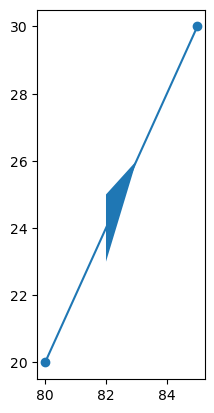

In [53]:
df_shape.plot()

In [54]:
#If we want to export these featuresinto a single shape file, it does not work, as shape file is limited to only 1 geometry type:
#either point or line or polygon
#therefore df_shape.to_file('path+shapefeatures.shp') does not work
df_shape.to_file(r'F:\python\RS_GIS_Python\shapefeatures.shp') 
#In anycase if we want to same the features then save them seperately as point , line and polygon shape files

RuntimeError: GDAL Error: Attempt to write non-point (LINESTRING) geometry to point shapefile.. Failed to write record: <fiona.model.Feature object at 0x0000022D289A1CC0>

In [56]:
#We can save these features in geojson format
df_shape.to_file(r'F:\python\RS_GIS_Python\Output\df_shape.geojson', driver='GeoJSON')